<a href="https://colab.research.google.com/github/aayushkubb/Deep_Learning_Tutorial/blob/master/CIFAR_with_Tensorflow_KERAS_CNN_and_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
sns.set()


### Load the Dataset and Prepare testing and training data

In [46]:
from keras.datasets import cifar10
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten, MaxPool2D

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

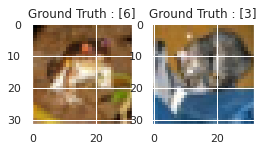

In [6]:
print('Training data shape : ', x_train.shape, y_train.shape)

print('Testing data shape : ', x_test.shape, y_test.shape)

# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_test[0]))

## Display images for each category

0


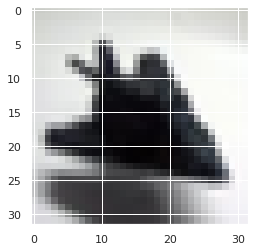

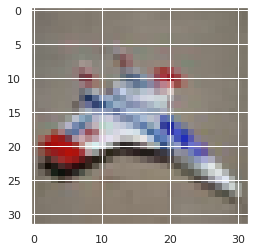

**************************************************
1


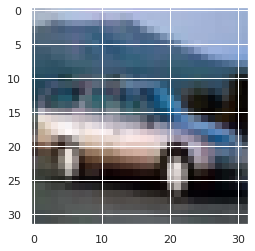

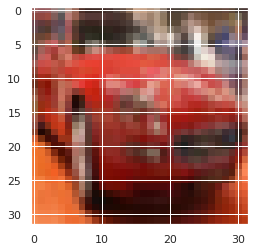

**************************************************
2


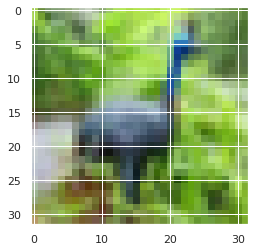

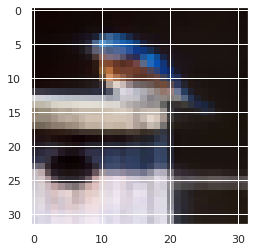

**************************************************
3


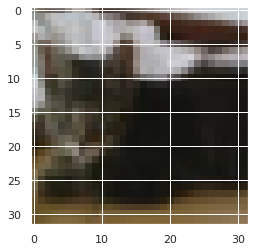

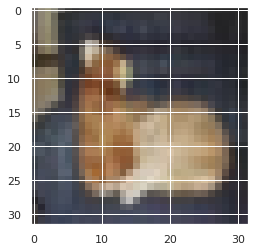

**************************************************
4


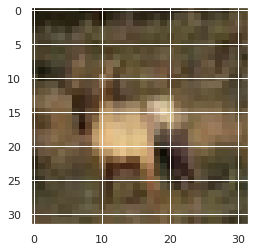

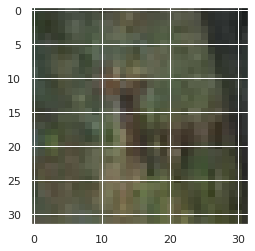

**************************************************
5


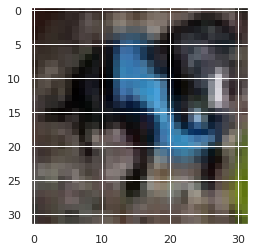

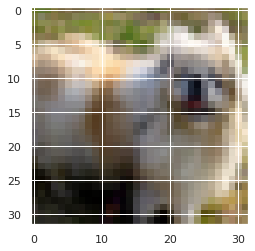

**************************************************
6


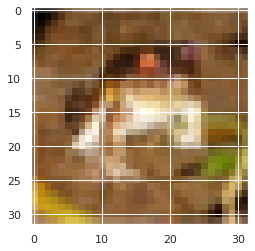

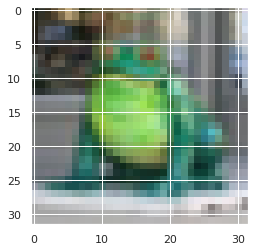

**************************************************
7


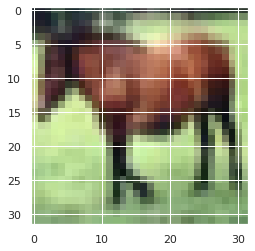

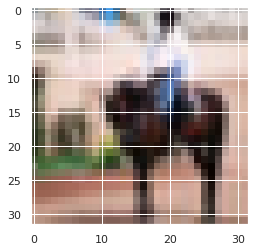

**************************************************
8


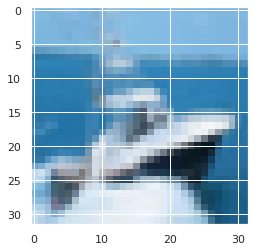

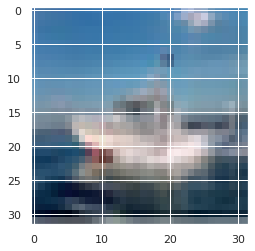

**************************************************
9


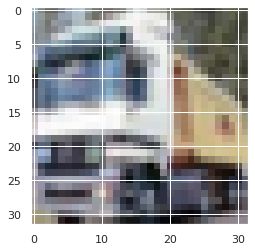

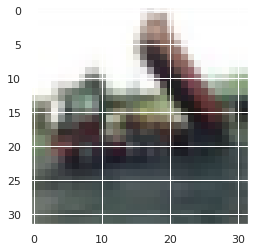

**************************************************


In [7]:
for category in np.unique(y_train):
  counter=2
  print(category)
  for idx, label in enumerate(y_train):
    if counter <1:
      break
    if label==category:
      
      counter-= 1
      plt.imshow(x_train[idx])
      plt.show()
  print("*"*50)

# Approach -1 - Using simple DNN or FC

In [8]:
# Load the data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

# train set / data 
x_train = x_train.reshape(-1, 32*32*3)
x_train = x_train.astype('float32') / 255



# test set / data 
x_test = x_test.reshape(-1, 32*32*3)
x_test = x_test.astype('float32') / 255

# train set / target 
y_train = tf.keras.utils.to_categorical(y_train , num_classes=10)

# test set / target 
y_test = tf.keras.utils.to_categorical(y_test , num_classes=10)

In [21]:
x_train.shape,x_test.shape

((50000, 3072), (10000, 3072))

In [18]:
#Models
model = Sequential()
model.add(Dense(800, input_dim=3072, activation="relu"))
model.add(Dense(10, activation="softmax"))

# For using custom metrics
# https://keras.io/api/metrics/#custom-metrics

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy",tf.keras.metrics.AUC()])
history = model.fit(x_train, y_train, validation_data=(x_test,y_test),
                    batch_size=200, 
                    epochs=5,  
                    verbose=1)
# https://keras.io/api/models/model_training_apis/

Epoch 1/5
250/250 [==============================] - 3s 9ms/step - loss: 1.9939 - accuracy: 0.2957 - auc_1: 0.7435 - val_loss: 1.8861 - val_accuracy: 0.3243 - val_auc_1: 0.7800
Epoch 2/5
250/250 [==============================] - 2s 8ms/step - loss: 1.8353 - accuracy: 0.3627 - auc_1: 0.7955 - val_loss: 1.8078 - val_accuracy: 0.3723 - val_auc_1: 0.8023
Epoch 3/5
250/250 [==============================] - 2s 8ms/step - loss: 1.7820 - accuracy: 0.3804 - auc_1: 0.8092 - val_loss: 1.7583 - val_accuracy: 0.3902 - val_auc_1: 0.8142
Epoch 4/5
250/250 [==============================] - 2s 8ms/step - loss: 1.7447 - accuracy: 0.3948 - auc_1: 0.8183 - val_loss: 1.7296 - val_accuracy: 0.4013 - val_auc_1: 0.8210
Epoch 5/5
250/250 [==============================] - 2s 8ms/step - loss: 1.7152 - accuracy: 0.4081 - auc_1: 0.8254 - val_loss: 1.7025 - val_accuracy: 0.4055 - val_auc_1: 0.8280


In [22]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 800)               2458400   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                8010      
Total params: 2,466,410
Trainable params: 2,466,410
Non-trainable params: 0
_________________________________________________________________


In [19]:
history.history

{'accuracy': [0.2957000136375427,
  0.3626599907875061,
  0.38043999671936035,
  0.3947800099849701,
  0.4081000089645386],
 'auc_1': [0.7435045838356018,
  0.7954919934272766,
  0.8091513514518738,
  0.8182570338249207,
  0.8254346251487732],
 'loss': [1.9938892126083374,
  1.835279941558838,
  1.7819973230361938,
  1.7447346448898315,
  1.7151721715927124],
 'val_accuracy': [0.32429999113082886,
  0.37229999899864197,
  0.3901999890804291,
  0.40130001306533813,
  0.40549999475479126],
 'val_auc_1': [0.7799704074859619,
  0.8022603988647461,
  0.8142317533493042,
  0.8210166692733765,
  0.8279764652252197],
 'val_loss': [1.8861277103424072,
  1.80778968334198,
  1.7583355903625488,
  1.729553461074829,
  1.7025136947631836]}

Text(0.5, 1.0, 'Loss Curves')

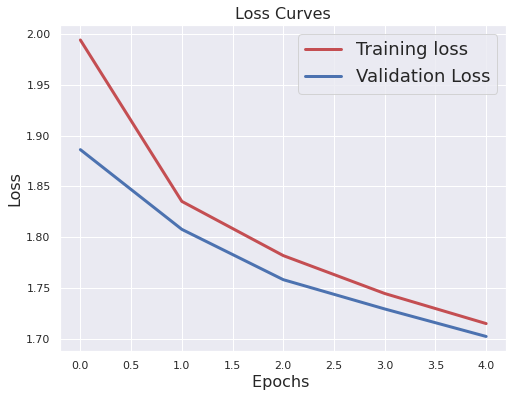

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

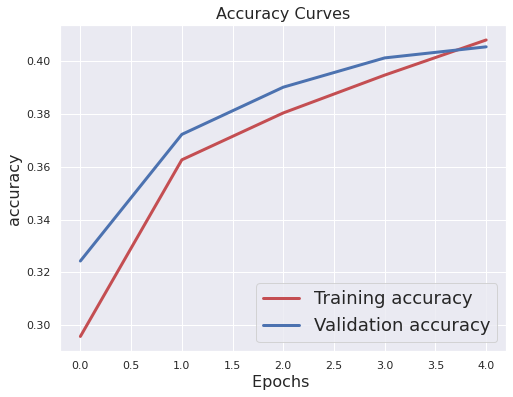

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Text(0.5, 1.0, 'AUC Curves')

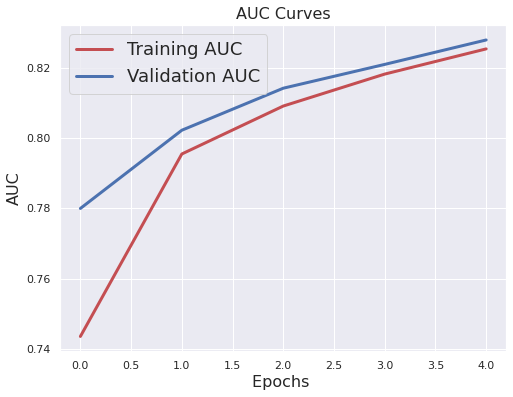

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history.history['auc_1'],'r',linewidth=3.0)
plt.plot(history.history['val_auc_1'],'b',linewidth=3.0)
plt.legend(['Training AUC', 'Validation AUC'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('AUC',fontsize=16)
plt.title('AUC Curves',fontsize=16)

# Approach -2 : Using CNN

## Change the Datatype to Float and Normalize it

In [26]:
# Load the data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

#Normalize
x_train=x_train.astype('float64')/255
x_test=x_test.astype('float64')/255

In [27]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


## Do the one hot Encoding of the Dependent Variable using Keras.utils

In [28]:
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

In [29]:
num_classes= len(np.unique(y_train))

In [30]:
y_train= to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)


### Divide the Training Dataset into  validation, Training and Test.

In [31]:
(y_train, y_valid) = y_train[5000:], y_train[:5000]
(x_train, x_valid) = x_train[5000:], x_train[:5000]

In [32]:
print(y_train.shape)
print(x_train.shape)

(45000, 10)
(45000, 32, 32, 3)


In [33]:
print(y_valid.shape)
print(x_valid.shape)


(5000, 10)
(5000, 32, 32, 3)


#  

## Build a CNN Architecture with KERAS

#### CNN using just the CONV layers

In [41]:
model=Sequential()
model.add(Conv2D(filters=9,kernel_size=3,activation='relu',input_shape=(32, 32, 3)))
model.add(Conv2D(filters=6,kernel_size=3,activation='relu'))
model.add(Conv2D(filters=3,kernel_size=3,activation='relu'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 9)         252       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 6)         492       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 3)         165       
Total params: 909
Trainable params: 909
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 9)         252       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 6)         492       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 3)         165       
_________________________________________________________________
flatten_2 (Flatten)          (None, 2028)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               519424    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2570      
Total params: 522,903
Trainable params: 522,903
Non-trainable params: 0
________________________________________________

In [43]:
#Compile & Train the model
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
history = model.fit(x_train, y_train, validation_data=(x_valid,y_valid),
                    batch_size=200, 
                    epochs=5,  
                    verbose=1)

Epoch 1/5
225/225 [==============================] - 30s 13ms/step - loss: 2.2834 - accuracy: 0.1184 - val_loss: 2.2129 - val_accuracy: 0.1480
Epoch 2/5
225/225 [==============================] - 3s 11ms/step - loss: 2.0828 - accuracy: 0.2471 - val_loss: 1.9537 - val_accuracy: 0.3098
Epoch 3/5
225/225 [==============================] - 3s 12ms/step - loss: 1.9038 - accuracy: 0.3253 - val_loss: 1.7881 - val_accuracy: 0.3584
Epoch 4/5
225/225 [==============================] - 3s 12ms/step - loss: 1.7970 - accuracy: 0.3646 - val_loss: 1.7319 - val_accuracy: 0.3826
Epoch 5/5
225/225 [==============================] - 3s 12ms/step - loss: 1.7247 - accuracy: 0.3860 - val_loss: 1.6539 - val_accuracy: 0.4136


Text(0.5, 1.0, 'Accuracy Curves')

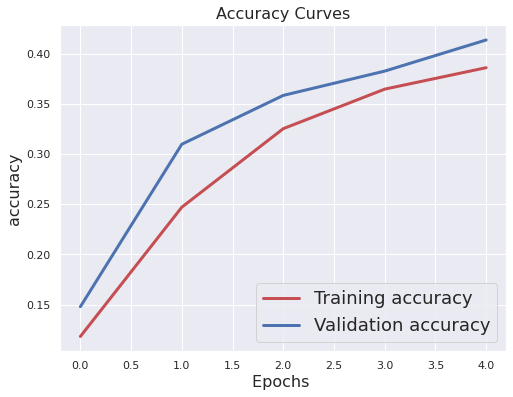

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Text(0.5, 1.0, 'Loss Curves')

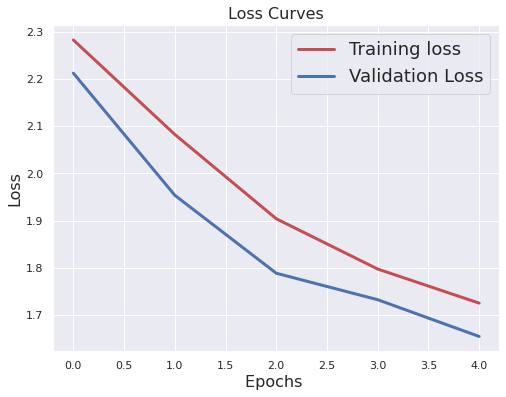

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#### CNN using CONV+ POOLING Layers

In [51]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())

model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.summary()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 64)              

In [52]:
#Compile & Train the model
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
history = model.fit(x_train, y_train, validation_data=(x_valid,y_valid),
                    batch_size=200, 
                    epochs=5,  
                    verbose=1)

Epoch 1/5
225/225 [==============================] - 3s 10ms/step - loss: 2.3017 - accuracy: 0.1176 - val_loss: 2.3002 - val_accuracy: 0.1296
Epoch 2/5
225/225 [==============================] - 2s 8ms/step - loss: 2.2984 - accuracy: 0.1468 - val_loss: 2.2964 - val_accuracy: 0.1524
Epoch 3/5
225/225 [==============================] - 2s 8ms/step - loss: 2.2929 - accuracy: 0.1756 - val_loss: 2.2881 - val_accuracy: 0.1790
Epoch 4/5
225/225 [==============================] - 2s 8ms/step - loss: 2.2773 - accuracy: 0.1872 - val_loss: 2.2594 - val_accuracy: 0.2100
Epoch 5/5
225/225 [==============================] - 2s 9ms/step - loss: 2.2106 - accuracy: 0.2093 - val_loss: 2.1319 - val_accuracy: 0.2390


Text(0.5, 1.0, 'Loss Curves')

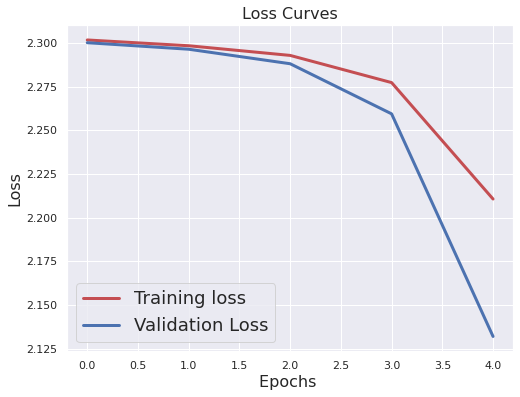

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

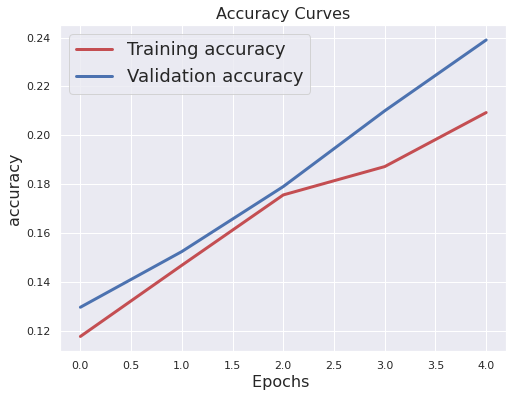

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## Build a CNN Architecture with Tensorflow

In [55]:
import tensorflow as tf

In [56]:
del model
model= tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)              

In [57]:
x_train.shape,y_train.shape

((45000, 32, 32, 3), (45000, 10))

In [58]:
answers=model.fit(x_train,y_train,
                  validation_data=(x_valid,y_valid),
                  shuffle=True,epochs=2,verbose=2,batch_size=200)

Epoch 1/2
225/225 - 2s - loss: 1.9808 - accuracy: 0.2617 - val_loss: 1.7407 - val_accuracy: 0.3668
Epoch 2/2
225/225 - 1s - loss: 1.6741 - accuracy: 0.3857 - val_loss: 1.5979 - val_accuracy: 0.4172


### Stack an ANN on top of CNN

In [59]:
model= tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.summary()

### Stack an ANN on top of CNN

model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))

model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))

model.add(tf.keras.layers.Dense(units=10,activation='softmax',kernel_initializer='uniform'))

model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 4, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 64)              

### Fit the model

In [60]:
answers=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),shuffle=True,epochs=2,verbose=2,batch_size=500)

Epoch 1/2
90/90 - 3s - loss: 2.0453 - accuracy: 0.1958 - val_loss: 1.8615 - val_accuracy: 0.2660
Epoch 2/2
90/90 - 1s - loss: 1.7912 - accuracy: 0.3059 - val_loss: 1.7273 - val_accuracy: 0.3378


### Evaluate the Results

In [61]:
results=model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.7144 - accuracy: 0.3402


In [62]:
answers.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

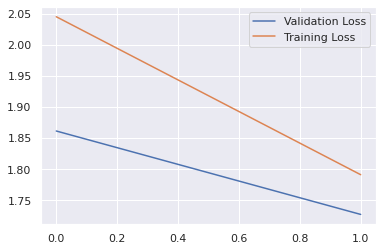

In [63]:
plt.plot(answers.history['val_loss'],label='Validation Loss');
plt.plot(answers.history['loss'],label='Training Loss');
plt.legend();

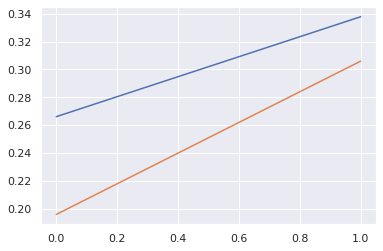

In [64]:
plt.plot(answers.history['val_accuracy'],label='Validation Accuracy');
plt.plot(answers.history['accuracy'],label='Training Accuracy');
plt.legend;

# Approch -3 CNN

In [66]:
from keras.layers import Conv2D, Flatten
simple_cnn_model = Sequential()
simple_cnn_model.add(Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu'))
simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
simple_cnn_model.add(Flatten())
simple_cnn_model.add(Dense(10, activation='softmax'))

simple_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
simple_cnn_model_history = simple_cnn_model.fit(x_train,y_train,validation_data=(x_valid,y_valid), batch_size=100, epochs=8)

Epoch 1/8
450/450 [==============================] - 7s 15ms/step - loss: 1.4952 - accuracy: 0.4668 - val_loss: 1.2288 - val_accuracy: 0.5722
Epoch 2/8
450/450 [==============================] - 7s 15ms/step - loss: 1.1346 - accuracy: 0.6026 - val_loss: 1.0630 - val_accuracy: 0.6252
Epoch 3/8
450/450 [==============================] - 7s 15ms/step - loss: 0.9732 - accuracy: 0.6614 - val_loss: 1.0228 - val_accuracy: 0.6516
Epoch 4/8
450/450 [==============================] - 7s 15ms/step - loss: 0.8715 - accuracy: 0.7003 - val_loss: 1.0274 - val_accuracy: 0.6444
Epoch 5/8
450/450 [==============================] - 7s 15ms/step - loss: 0.7749 - accuracy: 0.7331 - val_loss: 1.0405 - val_accuracy: 0.6490
Epoch 6/8
450/450 [==============================] - 7s 15ms/step - loss: 0.6984 - accuracy: 0.7604 - val_loss: 1.0369 - val_accuracy: 0.6440
Epoch 7/8
450/450 [==============================] - 7s 15ms/step - loss: 0.6157 - accuracy: 0.7872 - val_loss: 1.1031 - val_accuracy: 0.6424
Epoch 

# CNN - Experiment - 4

In [68]:
from keras.layers import Conv2D, Flatten
simple_cnn_model = Sequential()
simple_cnn_model.add(Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu'))
simple_cnn_model.add(MaxPool2D(pool_size=2))
simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
simple_cnn_model.add(MaxPool2D(pool_size=2))
simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
simple_cnn_model.add(Flatten())
simple_cnn_model.add(Dense(10, activation='softmax'))

simple_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
simple_cnn_model_history = simple_cnn_model.fit(x_train,y_train,validation_data=(x_valid,y_valid), batch_size=100, epochs=8)

Epoch 1/8
450/450 [==============================] - 4s 7ms/step - loss: 1.6925 - accuracy: 0.3810 - val_loss: 1.4810 - val_accuracy: 0.4808
Epoch 2/8
450/450 [==============================] - 3s 7ms/step - loss: 1.3965 - accuracy: 0.4978 - val_loss: 1.3263 - val_accuracy: 0.5260
Epoch 3/8
450/450 [==============================] - 3s 7ms/step - loss: 1.2765 - accuracy: 0.5483 - val_loss: 1.2213 - val_accuracy: 0.5732
Epoch 4/8
450/450 [==============================] - 3s 7ms/step - loss: 1.2021 - accuracy: 0.5767 - val_loss: 1.1976 - val_accuracy: 0.5762
Epoch 5/8
450/450 [==============================] - 3s 7ms/step - loss: 1.1426 - accuracy: 0.5972 - val_loss: 1.1872 - val_accuracy: 0.5938
Epoch 6/8
450/450 [==============================] - 3s 7ms/step - loss: 1.0945 - accuracy: 0.6161 - val_loss: 1.0518 - val_accuracy: 0.6252
Epoch 7/8
450/450 [==============================] - 3s 7ms/step - loss: 1.0406 - accuracy: 0.6370 - val_loss: 1.0406 - val_accuracy: 0.6334
Epoch 8/8
450

# Alternative Approach
https://www.kaggle.com/aayushkubba/cifar-10-analysis-with-a-neural-network